In [163]:
import csv
import pandas as pd
from pandas import DataFrame
import numpy as np
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt

In [164]:
purchase_data = pd.read_csv("Data_Set_LTV Exercise.csv")
purchase_data['created_at'] = pd.to_datetime(purchase_data['created_at'])
purchase_data['cohort_date'] = purchase_data.groupby('customer_id')['created_at'].transform('min')
purchase_data['cohort'] = purchase_data['cohort_date'].dt.strftime('%Y-%m')
purchase_data['purchase_cnt'] = purchase_data.groupby('customer_id')['increment_id'].transform('count')
purchase_data['purchase_cnt_grp'] = purchase_data['purchase_cnt'].apply(lambda x: x if x < 9 else '9+')
purchase_data.head()

,increment_id,status,created_at,customer_id,gross_order_revenue,cohort_date,cohort,purchase_cnt,purchase_cnt_grp
0,200095401,complete,2015-02-01 02:53:00,1000477,74.95,2015-02-01 02:53:00,2015-02,2,2
1,200095423,complete,2015-02-01 06:04:00,1000478,84.95,2015-02-01 06:04:00,2015-02,1,1
2,200095430,complete,2015-02-01 06:55:00,1000479,220.89,2015-02-01 06:55:00,2015-02,1,1
3,200095436,complete,2015-02-01 07:41:00,1000480,182.99,2015-02-01 07:41:00,2015-02,1,1
4,200095440,complete,2015-02-01 08:03:00,1000481,32.99,2015-02-01 08:03:00,2015-02,1,1


In [165]:
cohort_feb2015 = purchase_data[purchase_data.cohort == '2015-02']
cohort_feb2015.head()

,increment_id,status,created_at,customer_id,gross_order_revenue,cohort_date,cohort,purchase_cnt,purchase_cnt_grp
0,200095401,complete,2015-02-01 02:53:00,1000477,74.95,2015-02-01 02:53:00,2015-02,2,2
1,200095423,complete,2015-02-01 06:04:00,1000478,84.95,2015-02-01 06:04:00,2015-02,1,1
2,200095430,complete,2015-02-01 06:55:00,1000479,220.89,2015-02-01 06:55:00,2015-02,1,1
3,200095436,complete,2015-02-01 07:41:00,1000480,182.99,2015-02-01 07:41:00,2015-02,1,1
4,200095440,complete,2015-02-01 08:03:00,1000481,32.99,2015-02-01 08:03:00,2015-02,1,1


In [166]:
cohort_feb2015_sum = pd.DataFrame(np.array([[cohort_feb2015['gross_order_revenue'].sum(),
                                             cohort_feb2015['customer_id'].nunique(),
                                             cohort_feb2015['gross_order_revenue'].sum()/cohort_feb2015['customer_id'].nunique()]]),
                   columns=['purchase_sum_ttl', 'customers_ttl', 'ltv_ttl'])
cohort_feb2015_sum['key'] = 0
cohort_feb2015_sum

,purchase_sum_ttl,customers_ttl,ltv_ttl,key
0,221190.92,879.0,251.639272,0


In [170]:
cohort_feb2015_gpd = cohort_feb2015.groupby('purchase_cnt_grp').agg({'gross_order_revenue':'sum',
                                                                     'customer_id':'nunique'})
cohort_feb2015_gpd = cohort_feb2015_gpd.rename(columns={'customer_id': 'customer_cnt', 'gross_order_revenue':'purchase_sum'})
cohort_feb2015_gpd['ltv'] = cohort_feb2015_gpd['purchase_sum']/cohort_feb2015_gpd['customer_cnt']
cohort_feb2015_gpd['ltv'] = cohort_feb2015_gpd['ltv'].round(0)
cohort_feb2015_gpd['key'] = 0
cohort_feb2015_gpd = cohort_feb2015_gpd.reset_index()
cohort_feb2015_gpd

,purchase_cnt_grp,purchase_sum,customer_cnt,ltv,key
0,1,118559.36,650,182.0,0
1,2,48808.49,140,349.0,0
2,3,22020.56,51,432.0,0
3,4,11850.43,18,658.0,0
4,5,4682.25,8,585.0,0
5,6,5906.07,3,1969.0,0
6,7,2237.46,3,746.0,0
7,9+,7126.30,6,1188.0,0


In [179]:
cohort_feb2015 =  pd.merge(cohort_feb2015_gpd, cohort_feb2015_sum, on='key')
cohort_feb2015['pct_customers'] = cohort_feb2015['customer_cnt']/cohort_feb2015['customers_ttl']
cohort_feb2015['pct_customers'] = cohort_feb2015['pct_customers'].round(3)
cohort_feb2015['pct_revenue'] = cohort_feb2015['purchase_sum']/cohort_feb2015['purchase_sum_ttl']
cohort_feb2015['pct_revenue'] = cohort_feb2015['pct_revenue'].round(3)
cohort_feb2015 = cohort_feb2015[['purchase_cnt_grp','pct_customers','pct_revenue','ltv']].copy()
cohort_feb2015

,purchase_cnt_grp,pct_customers,pct_revenue,ltv
0,1,0.74,0.54,182.0
1,2,0.16,0.22,349.0
2,3,0.06,0.10,432.0
3,4,0.02,0.05,658.0
4,5,0.01,0.02,585.0
5,6,0.00,0.03,1969.0
6,7,0.00,0.01,746.0
7,9+,0.01,0.03,1188.0


In [210]:
feb2015_ttl = pd.DataFrame(np.array([['total',
                                  cohort_feb2015['pct_customers'].sum().round(0),
                                  cohort_feb2015['pct_revenue'].sum().round(0)]]),
                   columns=['purchase_cnt_grp','pct_customers', 'pct_revenue'])
feb2015_ttl['ltv'] = cohort_feb2015_sum['ltv_ttl'].round(0)
feb2015_ttl

,purchase_cnt_grp,pct_customers,pct_revenue,ltv
0,total,1.0,1.0,252.0


In [211]:
feb2015 = pd.concat([feb2015_ttl,cohort_feb2015])
feb2015

,purchase_cnt_grp,pct_customers,pct_revenue,ltv
0,total,1.0,1.0,252.0
0,1,0.74,0.54,182.0
1,2,0.16,0.22,349.0
2,3,0.06,0.1,432.0
3,4,0.02,0.05,658.0
4,5,0.01,0.02,585.0
5,6,0,0.03,1969.0
6,7,0,0.01,746.0
7,9+,0.01,0.03,1188.0


In [184]:
timeseries_df = purchase_data[["customer_id","cohort","cohort_date","created_at","gross_order_revenue"]].copy()
timeseries_df.head()

,customer_id,cohort,cohort_date,created_at,gross_order_revenue
0,1000477,2015-02,2015-02-01 02:53:00,2015-02-01 02:53:00,74.95
1,1000478,2015-02,2015-02-01 06:04:00,2015-02-01 06:04:00,84.95
2,1000479,2015-02,2015-02-01 06:55:00,2015-02-01 06:55:00,220.89
3,1000480,2015-02,2015-02-01 07:41:00,2015-02-01 07:41:00,182.99
4,1000481,2015-02,2015-02-01 08:03:00,2015-02-01 08:03:00,32.99


In [185]:
def diff_month(d1, d2):
    return (d1.dt.year - d2.dt.year) * 12 + d1.dt.month - d2.dt.month

timeseries_df["month_no"] = diff_month(timeseries_df["created_at"], timeseries_df["cohort_date"])
timeseries_df.head()

,customer_id,cohort,cohort_date,created_at,gross_order_revenue,month_no
0,1000477,2015-02,2015-02-01 02:53:00,2015-02-01 02:53:00,74.95,0
1,1000478,2015-02,2015-02-01 06:04:00,2015-02-01 06:04:00,84.95,0
2,1000479,2015-02,2015-02-01 06:55:00,2015-02-01 06:55:00,220.89,0
3,1000480,2015-02,2015-02-01 07:41:00,2015-02-01 07:41:00,182.99,0
4,1000481,2015-02,2015-02-01 08:03:00,2015-02-01 08:03:00,32.99,0


In [186]:
timeseries_sum = timeseries_df.groupby(['cohort','month_no']).agg({'gross_order_revenue':'sum',
                                                                   'customer_id':'nunique'})
timeseries_sum["running_sum"] = timeseries_sum.groupby(['cohort','month_no']).sum().groupby('cohort')[["gross_order_revenue"]].cumsum()
timeseries_sum["customer_cnt"] = timeseries_sum.groupby('cohort')['customer_id'].transform('max')
timeseries_sum["ltv"] = timeseries_sum["running_sum"]/timeseries_sum["customer_cnt"]
timeseries_sum = timeseries_sum.reset_index()
timeseries_sum = timeseries_sum.set_index('month_no')
timeseries_sum.head(100)

,cohort,gross_order_revenue,customer_id,running_sum,customer_cnt,ltv
month_no,,,,,,
0,2015-02,158479.85,879,158479.85,879,180.295620
1,2015-02,2851.21,21,161331.06,879,183.539317
2,2015-02,4877.02,25,166208.08,879,189.087691
3,2015-02,5117.84,25,171325.92,879,194.910034
4,2015-02,3279.42,17,174605.34,879,198.640887
...,...,...,...,...,...,...
0,2015-12,765863.68,3770,765863.68,3770,203.146865
1,2015-12,25701.98,157,791565.66,3770,209.964366
2,2015-12,25316.20,144,816881.86,3770,216.679538


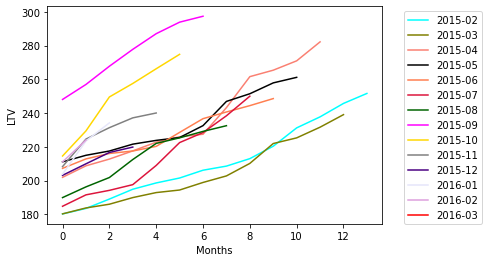

In [212]:
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2015-02'],'aqua', label = '2015-02')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2015-03'],'olive', label = '2015-03')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2015-04'],'salmon', label = '2015-04')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2015-05'],'black', label = '2015-05')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2015-06'],'coral', label = '2015-06')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2015-07'],'crimson', label = '2015-07')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2015-08'],'darkgreen', label = '2015-08')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2015-09'],'fuchsia', label = '2015-09')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2015-10'],'gold', label = '2015-10')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2015-11'],'grey', label = '2015-11')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2015-12'],'indigo', label = '2015-12')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2016-01'],'lavender', label = '2016-01')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2016-02'],'plum', label = '2016-02')
plt.plot(timeseries_sum["ltv"][timeseries_sum.cohort == '2016-03'],'red', label = '2016-03')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Months')
plt.ylabel('LTV')
plt.show()